## K-Means Clustering Model on Online Retail Customers 
In this model we shall be segregating online retail customers into different groups on the basis of their shopping nature using K-Means Algorithm.

<img src="https://media.giphy.com/media/12vVAGkaqHUqCQ/giphy.gif" width="500" height="200" align="center"/>

### Libraries and Packages used :

In [1]:
#Importing the requisite libraries for dataframe and visualization: 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
from pandas import ExcelWriter
from pandas import ExcelFile
#Importing the requisite libraries for Clustering:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Importing the Dataset :

In [2]:
#Reading the .xlsx(excel) data file using pandas into its data structure i.e.'DataFrames':
df=pd.read_excel('Online Retail.xlsx')

### Exploratory Data Analysis :

In [3]:
#Displaying the first 5 rows of our data stored in the DataFrame:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#Inspecting the shape of the dataframe:
df.shape

(541909, 8)

In [5]:
#Inspecting the last five rows of our data stored in the dataframe:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
#Collecting the superficial knowledge of our data calculated over the values present in each column:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Data Cleansing :

In [7]:
#Inspecting the data for the 'Null values' or 'No-value cells':
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


<b>Note:</b> Here it seems that some of the columns such as '<b>Description</b>' and '<b>CustomerID</b>' have some elements missing, which will be confirmed if we explore the data a little more. 

In [8]:
#Inspecting the number of 'Null elements' in each column:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<b>Note:</b> Hence it is confirmed that the elements are missing in the above quoted two columns.Since the dataset is quite large we shall be removing the rows with null elements.

In [9]:
#Droping the rows having missing elements:
df=df.dropna()
df.shape

(406829, 8)

<b>Note:</b> Clearly it can be seen that we have eliminated <b>541909 - 406829 = 135080</b> rows from our dataset as speicfied by info() function as well. 

In [10]:
#Re-checking the number of 'Null elements' in each column:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

<img src="https://media.giphy.com/media/xUA7aUWcPHkspyD1xS/giphy.gif" width="400" height="200" align="center"/>


                                           Hence our data is completely clean now!

### Preparation of Data as Model Parameters:
In Online Retail Shopping the customers are different from each other on the basis of their shopping behaviour/nature.This nature of customer reflects primarily on <b>3</b> major parameters which are as follows:
1. Number of days since the last purchase has been made by the customer(i.e. <b>Recency[R]</b>).
2. Number of transaction which have been made by the customer till date(i.e. <b>Frequency[F]</b>).
3. The amount of the transactions which have been made/contribution to revenue(i.e. <b>Monetary[M]</b>).

Hence the entire analysis and model construction will be based on <b>RFM parameters</b>.

In [11]:
#Starting with 'Monetary(M)' parameter, we shall be calculating the total amount of transactions made by each customer:
df['Amount']=df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [12]:
#Grouping and summing up the amounts of each customer:
revenue=df.groupby('CustomerID')['Amount'].sum()
revenue=revenue.reset_index()
revenue.columns=['CustomerID','Monetary']
revenue

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [13]:
#Taking 'Frequency(F)' as the next parameter,we shall be calculating the number of transactions which have been made by each customer till date:
frequency=df.groupby('CustomerID')['InvoiceNo'].count()
frequency=frequency.reset_index()
frequency.columns=['CustomerID','Frequency']
frequency

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


<b>Note:</b> Since the results generated by both the above parameters are in the dataframes of similar dimensions, therefore they can be merged together.


In [14]:
#Merging the dataframes:
revenue_frequency= pd.merge(revenue,frequency,on='CustomerID')
revenue_frequency

,CustomerID,Monetary,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4367,18280.0,180.60,10
4368,18281.0,80.82,7
4369,18282.0,176.60,13
4370,18283.0,2094.88,756


In [15]:
#Taking the last parameter 'Recency(R)' into consideration,we shall be calculating the number of days since the last purchase has been made by each customer:
#Converting the 'InvoiceDate' in the dataframe into proper python datatype:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M:%S')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [16]:
#In order to know the number of days since the last purchase, we need to first determine the last date upto which transactions have been taken into account:
max_timestamp= max(df['InvoiceDate'])
max_timestamp

Timestamp('2011-12-09 12:50:00')

<b>Note:</b> So the transactions in the datasheet have been listed uptill date:<b> 9 December 2011</b> and time:<b>12:50</b>.

In [17]:
#Calculating the number of days passed after each purchase:
df['Time Passed'] = max_timestamp-df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Time Passed
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [28]:
#Now the least value of 'Days Passed' for each 'CustomerID' will be the recency for each customer when he has made the purchase:
recency = df.groupby('CustomerID')['Time Passed'].min()
recency = recency.reset_index()
#Extracting only the 'Number of Days' passed:
recency['Days Passed']=recency['Time Passed'].dt.days
recency=recency.drop('Time Passed',axis=1)
recency.columns=['CustomerID','Recency']
recency

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4367,18280.0,277
4368,18281.0,180
4369,18282.0,7
4370,18283.0,3


<b>Note:</b> Since the resulting dataframe from the last parameter is of the same type and dimension as of <b>revenue_frequency</b> therefore we can merge the results of all the parameters.

In [47]:
#Merging the dataframes:
rev_fre_rec=pd.merge(revenue_frequency,recency,on='CustomerID',how='inner')
rev_fre_rec

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7
4370,18283.0,2094.88,756,3


### Outlier Analysis using Boxplots:
In this analysis we shall identify the outliers in each of the above derived parameters and shall treat them.

Text(0.5, 0, 'Monetary')

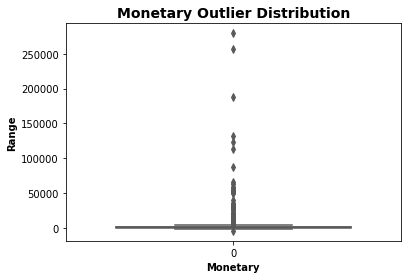

In [30]:
#Outlier Analysis for 'Amount':
plt.plot(figsize=(6,4))
sns.boxplot(data = rev_fre_rec['Monetary'], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Monetary Outlier Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Monetary", fontweight = 'bold')

Text(0.5, 0, 'Monetary')

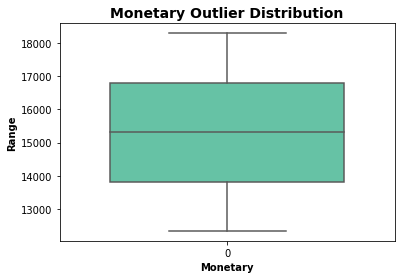

In [31]:
#Outliers Treatment for 'Amount':
Q1 = rev_fre_rec['Monetary'].quantile(0.05)
Q3 = rev_fre_rec['Monetary'].quantile(0.95)
IQR = Q3 - Q1
rev_fre_rec['Monetary'] = rev_fre_rec[(rev_fre_rec['Monetary'] >= Q1 - 1.5*IQR) & (rev_fre_rec['Monetary'] <= Q3 + 1.5*IQR)]
plt.plot(figsize=(6,4))
sns.boxplot(data = rev_fre_rec['Monetary'], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Monetary Outlier Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Monetary", fontweight = 'bold')

Text(0.5, 0, 'Frequency')

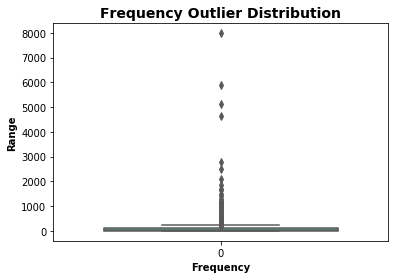

In [32]:
#Outlier Analysis for 'Frequency':
plt.plot(figsize=(6,4))
sns.boxplot(data = rev_fre_rec['Frequency'], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Frequency Outlier Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Frequency", fontweight = 'bold')

Text(0.5, 0, 'Frequency')

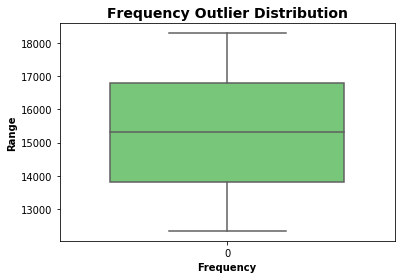

In [33]:
#Outliers Treatment for 'Frequency':
Q2 = rev_fre_rec['Frequency'].quantile(0.05)
Q4 = rev_fre_rec['Frequency'].quantile(0.95)
IQR = Q4 - Q2
rev_fre_rec['Frequency'] = rev_fre_rec[(rev_fre_rec['Frequency'] >= Q2 - 1.5*IQR) & (rev_fre_rec['Frequency'] <= Q4 + 1.5*IQR)]
plt.plot(figsize=(6,4))
sns.boxplot(data = rev_fre_rec['Frequency'], orient="v", palette="YlGn" ,whis=1.5,saturation=1, width=0.7)
plt.title("Frequency Outlier Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Frequency", fontweight = 'bold')

Text(0.5, 0, 'Recency')

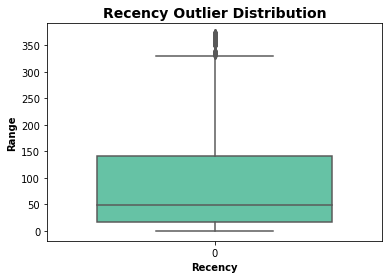

In [34]:
#Outlier Analysis for 'Recency':
plt.plot(figsize=(6,4))
sns.boxplot(data = rev_fre_rec['Recency'], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Recency Outlier Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Recency", fontweight = 'bold')

Text(0.5, 0, 'Recency')

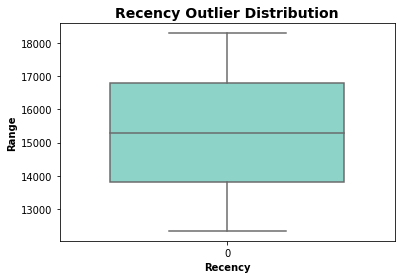

In [35]:
#Outliers Treatment for 'Recency':
Q1 = rev_fre_rec['Recency'].quantile(0.05)
Q3 = rev_fre_rec['Recency'].quantile(0.95)
IQR = Q3 - Q1
rev_fre_rec['Recency'] = rev_fre_rec[(rev_fre_rec['Recency'] >= Q1 - 1.5*IQR) & (rev_fre_rec['Recency'] <= Q3 + 1.5*IQR)]
plt.plot(figsize=(6,4))
sns.boxplot(data = rev_fre_rec['Recency'], orient="v", palette="Set3" ,whis=1.5,saturation=1, width=0.7)
plt.title("Recency Outlier Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Recency", fontweight = 'bold')

### Rescaling of Data:
Since all the three parameters have different ranges of values therefore it becomes mandatory to rescale the data to bring them to the same range.

In [36]:
#Storing the parameters only in a seperate dataframe:
rev_fre_rec_new = rev_fre_rec[['Monetary','Frequency','Recency']]
#Creating an Instance of StandardScaler Class:
scaler = StandardScaler()
rev_fre_rec_scaled=scaler.fit_transform(rev_fre_rec_new)
#Storing the scaled values into a dataframe:
rev_fre_rec_scaled=pd.DataFrame(rev_fre_rec_scaled)
rev_fre_rec_scaled.columns=['Monetary','Frequency','Recency']
rev_fre_rec_scaled=rev_fre_rec_scaled.dropna()

<b>Note:</b> Since our parameters are completely rescaled, hence we are ready to start building the model with our data.

### Building the Model:
Since we have chosen <b>k-Means Clustering</b> algorithm for our Model, therefore we shall choose any arbitary value of 'k'.In our case we shall take it as <b>k=4</b>.

In [37]:
#Fitting the dataset into the algorithm:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rev_fre_rec_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
#Displaying the Labels:
kmeans.labels_

array([3, 3, 3, ..., 0, 0, 0])

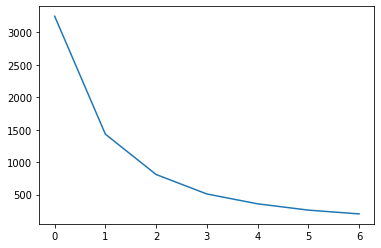

In [39]:
#Finding the Optimal Number of Clusters:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rev_fre_rec_scaled)
    
    ssd.append(kmeans.inertia_)
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [40]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rev_fre_rec_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rev_fre_rec_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6241661433796242
For n_clusters=3, the silhouette score is 0.5908356644542552
For n_clusters=4, the silhouette score is 0.5705466617067635
For n_clusters=5, the silhouette score is 0.5655481232241865
For n_clusters=6, the silhouette score is 0.5541701131782244
For n_clusters=7, the silhouette score is 0.5508553568469542
For n_clusters=8, the silhouette score is 0.5452008060002528


In [41]:
# Since a considerable fall in Silhouette score is seen at k=3 there we will build the final model with k=3:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rev_fre_rec_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
 kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [46]:
# Assigning the label/Cluster Ids:
rev_fre_rec_scaled['Cluster_Id'] = kmeans.labels_
rev_fre_rec_scaled.head()

,Monetary,Frequency,Recency,Cluster_Id
0,-1.716497,-1.714245,-1.715067,0
1,-1.715916,-1.713665,-1.714486,0
2,-1.715335,-1.713085,-1.713906,0
3,-1.714755,-1.712504,-1.713325,0
4,-1.714174,-1.711924,-1.712744,0


### Result Visualizations:

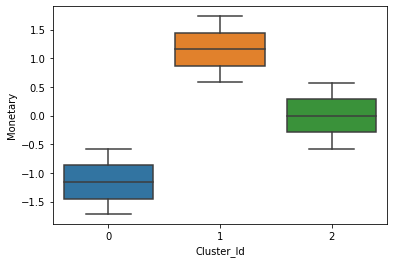

In [50]:
# Box plot to visualize 'Cluster Id' vs 'Monetary':
sns.boxplot(x='Cluster_Id', y='Monetary', data=rev_fre_rec_scaled)

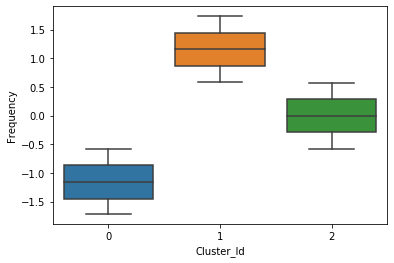

In [51]:
# Box plot to visualize 'Cluster Id' vs 'Frequency':
sns.boxplot(x='Cluster_Id', y='Frequency', data=rev_fre_rec_scaled)

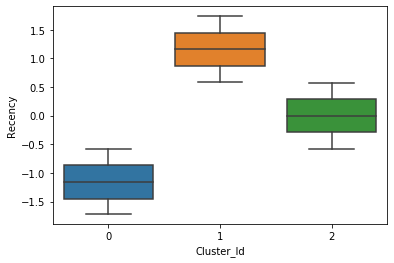

In [52]:
# Box plot to visualize 'Cluster Id' vs 'Frequency':
sns.boxplot(x='Cluster_Id', y='Recency', data=rev_fre_rec_scaled)

####              And with this we come to an end of our Clustering Model where each customer has been allocated his/her Cluster ID.
<img src="https://media.giphy.com/media/DAtJCG1t3im1G/giphy.gif" width="400" height="200" align="center"/>